# Data Project - Stock Market Analysis


In [ ]:
# imports

# basics
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

# for reading stock data from yahoo
from pandas_datareader import data

# for time stamps
from datetime import datetime

# for division
from __future__ import division


In [5]:
# technology stock list
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
# creating a end time
end = datetime.now()

# creating a start time
start = datetime(end.year -1, end.month, end.day)

In [10]:
# for loop for getting finance data and placing in a DF

for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [13]:
AAPL.describe()


,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,158.164303,154.401673,156.195617,156.368646,8.850388e+07,156.006623
std,12.729838,12.428611,12.653006,12.571544,2.666473e+07,12.551880
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.985001,145.279999,146.355003,146.625000,6.953115e+07,146.127609
50%,155.000000,151.289993,152.830002,153.119995,8.347440e+07,153.006042
75%,169.774994,165.525002,167.735001,166.894997,1.023522e+08,166.650146
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-07-26 to 2022-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

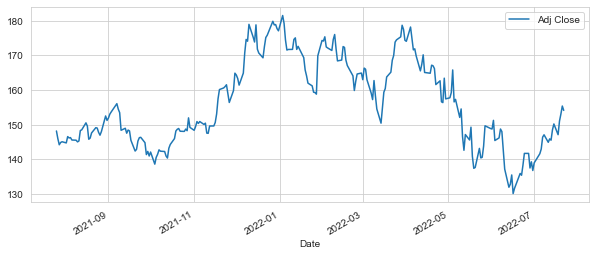

In [15]:
# visualizing the apple stock within the last year with pandas
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

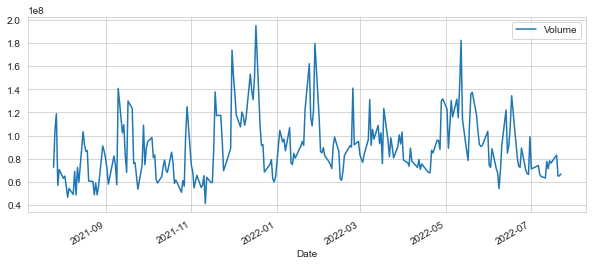

In [17]:
# plotting the total volume of stock traded everyday for the last year

AAPL['Volume'].plot(legend=True, figsize=(10,4));

In [ ]:
# calculate the moving average for the stock 